# Pymaceuticals
## John M. Warlop
## UCSD Data Science Bootcamp

## Observable Trends
* **Placebo**
  The placebo is not the worst perfomer.  Infubinol had worst survival rate. Ketapril had the most volume as well
* **Infubinal** Was the worst performer, because it had the lowest survival rate
* **Capomulin** Was the best performer. It had the highest survival rate(21) and clearly the lowest tumor volume(37).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb


def get_pop_start(d_d,drug):
    return( d_d[drug+'_0'])

def get_alive_stats(x_l_df,drug):
    still_alive = {}
    still_alive_p = {}
    c = 0
    for df in x_l_df:
        (timepoint,num_alive) = df['Timepoint'].values[0],df['Timepoint'].shape[0]
        if c == 0:
            alive_start = num_alive
            still_alive[drug]   = [ (timepoint,num_alive)]
            still_alive_p[drug] = [ (timepoint,num_alive/alive_start)]
        else:
            still_alive[drug].append( (timepoint,num_alive) )
            still_alive_p[drug].append( (timepoint,num_alive/alive_start) )
        c = 1
    return( (still_alive,still_alive_p) )

'''http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/'''
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height < 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')
        
def plot_line(ax,x,y,yerr_,title,xaxis,yaxis,label_):
    return(None)

def get_mean_x_vector(d,drug):
    o = []
    for e in d:
        if e[0:e.find('_')] == drug:
            o.append(d[e][0])
    return(o)

def get_std_dev_vector(dd,drug):
    o=[]
    for e in dd:
        if e[0:e.find('_')] == drug:
            o.append(dd[e][1])
    return(o)
    

'''Load Files'''
tr_df=pd.read_csv('raw_data/clinicaltrial_data.csv')
ms_df=pd.read_csv('raw_data/mouse_drug_data.csv')

'''Check that I have same number of unique Mouse IDs in both df'''
tr_df.columns
unq_mid_tr=tr_df['Mouse ID'].nunique()
unq_mid_ms=ms_df['Mouse ID'].nunique()
if unq_mid_tr == unq_mid_ms:
    print("Mouse ID's in both tables are identical, using inner join")
m_df = pd.merge(tr_df,ms_df,on='Mouse ID',how='inner')
m_df = m_df[ (m_df['Drug'] != 'Naftisol') & (m_df['Drug'] != 'Zoniferol') & \
             (m_df['Drug'] != 'Stelasyn') & (m_df['Drug'] != 'Ramicane')  & \
             (m_df['Drug'] != 'Propriva') & (m_df['Drug'] != 'Ceftamin')]
m_df.to_csv('raw_data/merged_data.csv')

m_gb            = m_df.groupby(['Drug','Timepoint'])
unq_tp_l        = m_df['Timepoint'].unique().tolist()
unq_drug_l      = m_df['Drug'].unique().tolist()
unq_msite_l     = m_df['Metastatic Sites'].unique().tolist()

Mouse ID's in both tables are identical, using inner join


## Tumor Volume

In [2]:
tumor_vol = {}
for drug in unq_drug_l:
    for time in unq_tp_l:
        q_df       = m_df[ (m_df['Timepoint'] == time) & (m_df['Drug'] == drug)]
        mean,std   = q_df['Tumor Volume (mm3)'].mean(),q_df['Tumor Volume (mm3)'].std()
        max_,min_  = q_df['Tumor Volume (mm3)'].max(),q_df['Tumor Volume (mm3)'].min()
        tumor_vol[drug+'_'+str(time)] = \
            (mean,std,max_,min_,q_df['Tumor Volume (mm3)'].tolist())


### Tumor Volume Change vs Days of Treatment w/error

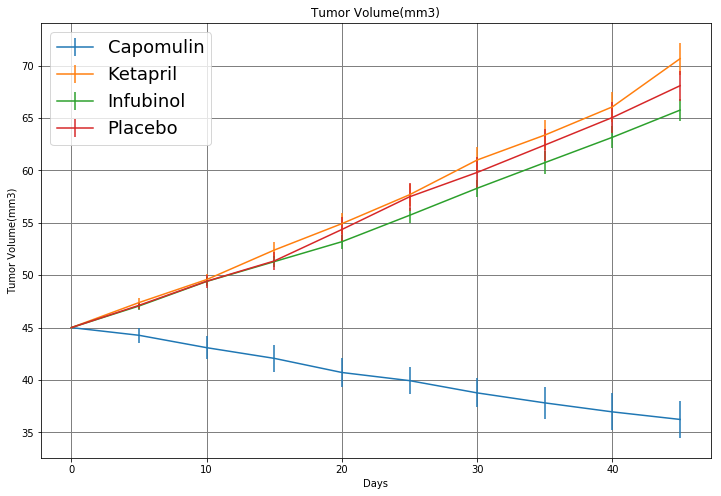

In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=12
fig_size[1]=8
ax = plt.gca()
ax.set_facecolor((1.,1.,1.))
for drug in unq_drug_l:
    y = get_mean_x_vector(tumor_vol,drug)
    std_dev_ = get_std_dev_vector(tumor_vol,drug)
    std_err_ = [x/(len(std_dev_)**.5) for x in std_dev_]
    ax.errorbar(np.arange(0,50,5),y,std_err_,label=drug)
ax.grid(color='grey', linestyle='-', linewidth=1)
ax.set_title('Tumor Volume(mm3)')
ax.set_xlabel('Days')
ax.set_ylabel('Tumor Volume(mm3)')

plt.legend(prop={'size':18})
plt.show()



In [4]:
dr_tp_df = m_df.groupby(['Drug','Timepoint'])['Timepoint']

### Tumor Volume Bar Chart 

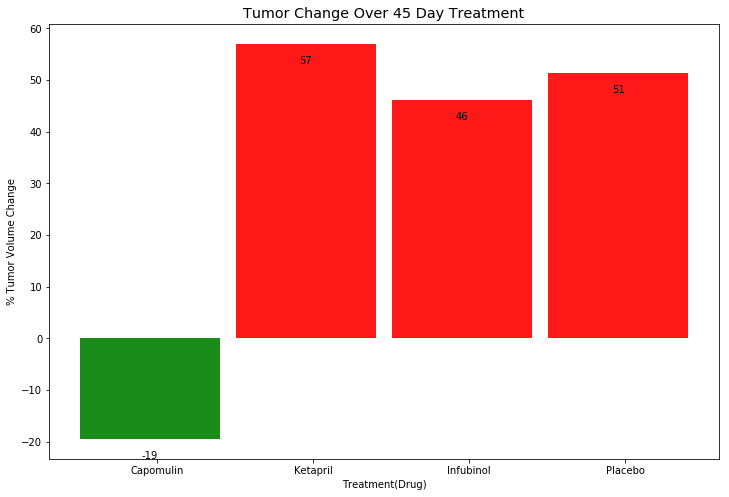

In [5]:
fig, ax = plt.subplots()
plt.style.use('ggplot')
max_ = max(m_df.groupby('Timepoint').groups.keys())
x = [i for i, _ in enumerate(unq_drug_l)]
y = []
width = .9
colors = []
for drug in unq_drug_l:
    end_mean = m_df.groupby(['Timepoint','Drug']).get_group((45,drug))['Tumor Volume (mm3)'].mean()
    percent_change = ((end_mean - max_)/max_)*100.0
    if percent_change > 0: 
        colors.append('r')
    else:
        colors.append('g')
    y.append(percent_change)
#EE3235
bbar = plt.bar(x,y,width,alpha=0.9,color=colors,label=unq_drug_l)
#Set Position of xticks
ax.set_xticks([p + 0.05 * width for p in x])
ax.set_xticklabels(unq_drug_l)
ax.set_facecolor('w')
plt.xlabel("Treatment(Drug)")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
autolabel(bbar,ax)
plt.show()
plt.clf()

## Metastatic Sites

In [6]:
'''    >>>>>>>>>>>>>>>>>>> Metastatic Sites Calculations <<<<<<<<<<<<<<<<<<<<<   '''
drug_msites_d={}
for drug in unq_drug_l:
    for time in unq_tp_l:
        q_df      = m_df[ (m_df['Timepoint'] == time) & (m_df['Drug'] == drug)]
        mean,std  = q_df['Metastatic Sites'].mean(),q_df['Metastatic Sites'].std()
        max_,min_ = q_df['Metastatic Sites'].max(),q_df['Metastatic Sites'].min()
        drug_msites_d[drug+'_'+str(time)] = \
            (mean,std,max_,min_,q_df['Metastatic Sites'].tolist())


### Metastatic Sites vs Days of Treatment w/error

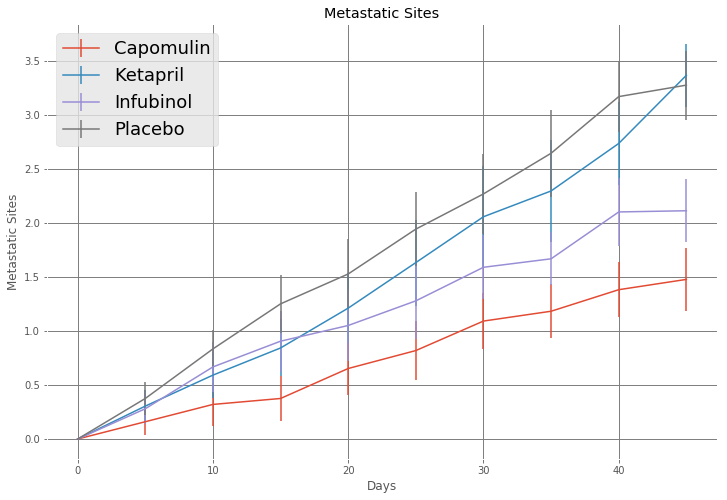

In [7]:
ax = plt.gca()
ax.grid(color='grey', linestyle='-', linewidth=1)
ax.set_facecolor((1.,1.,1.))
for drug in unq_drug_l:
    y = get_mean_x_vector(drug_msites_d,drug)
    std_dev_ = get_std_dev_vector(drug_msites_d,drug)
    std_err_ = [x/(len(std_dev_)**.5) for x in std_dev_]
    ax.errorbar(np.arange(0,50,5),y,std_err_,label=drug)
ax.set_title('Metastatic Sites')
plt.legend(prop={'size':18})
ax.set_xlabel('Days')
ax.set_ylabel('Metastatic Sites')
plt.show()

## Survival Rates

In [8]:
df_d={}

c = 0
for drug in unq_drug_l:
    c = 0
    for tp in unq_tp_l:
        if c == 0:
            df_d[drug] = [m_df[ (m_df['Timepoint'] == tp) & (m_df['Drug'] == drug)]]
        else:
            df_d[drug].extend([m_df[ (m_df['Timepoint'] == tp) & (m_df['Drug'] == drug)]])
        c = 1

### Mice Still Alive vs Days of Treatment w/o error

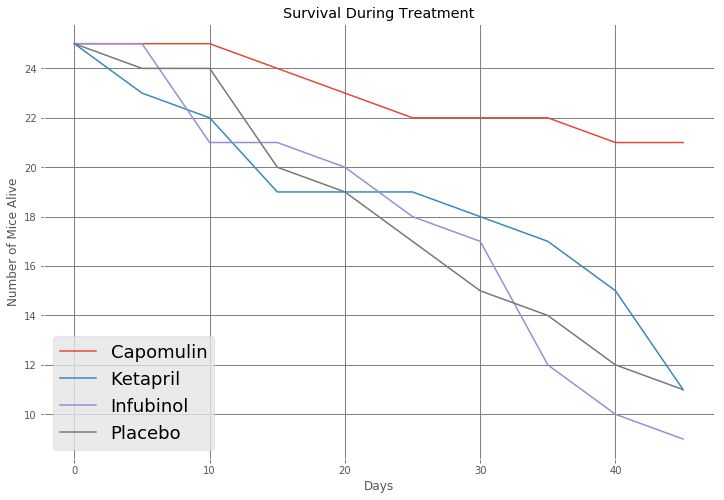

In [9]:
colors = ['b*-','r*-','g^-','y+-','m*-','kv-','cv-','b^-','r^-']
plt.clf()
ax = plt.subplot(111)
ax.set_facecolor('w')
ax.grid(color='grey', linestyle='-', linewidth=1)
for drug in unq_drug_l:
        alive_stats,alive_stats_p = get_alive_stats(df_d[drug],drug)
        x = [a[0] for a in alive_stats[drug]]
        y = [a[1] for a in alive_stats[drug]]
        ax.plot(x,y,label=drug)
        plt.title('Survival During Treatment')
        ax.set_ylabel('Number of Mice Alive')
        ax.set_xlabel('Days')
        oldp = ax.get_position()
        ax.set_position([oldp.x0,oldp.y0,oldp.width,oldp.height])
        ax.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=2,facecolor='white')
plt.legend(prop={'size':18})
plt.show()